Anodal vs Sham
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


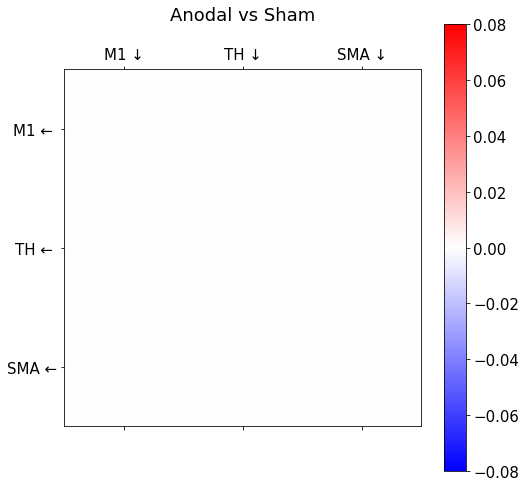

Cathodal vs Sham
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


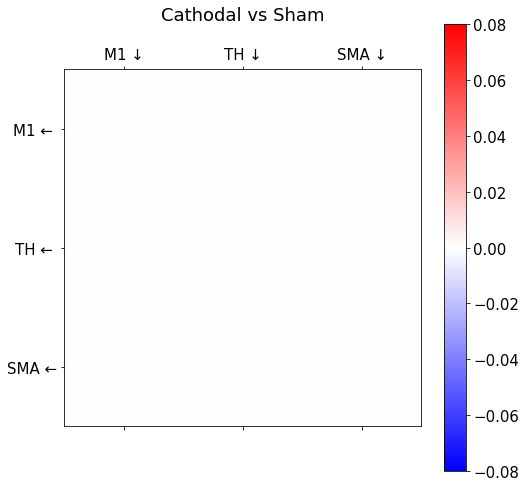

Anodal vs Cathodal
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.06274234 0.         0.        ]]


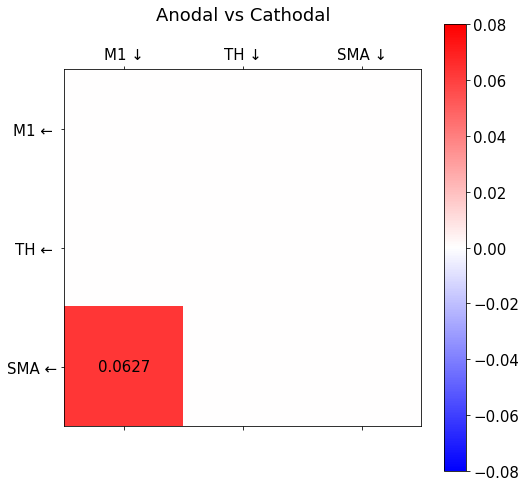

In [98]:
# Author Davide Aloi
# Description: plot PEB results (pairwise int day1 vs day5)

import numpy as np
import glob
from nilearn import image
import matplotlib.pyplot as plt
import scipy.io

path_DCM = 'C:\\Users\\davide\\Documents\\GitHub\\raindrop_analyses_fmri_eeg\\fmri\\DCM\\dcm_results_p01\\BMApairwiseA.mat'
DCM_results = scipy.io.loadmat(path_DCM)

## Parameters
# posterior probability threshold used
PP_threshold = 0.5

# function to convert diagnoal values to Hz and recenter on 0
funcHz = lambda x: -0.5*(np.exp(x))+0.5 if x != 0 else 0

# Matrix plot xticklabels / yticklabels
labelsUp = ['M1 ↓', 'TH ↓', 'SMA ↓']
labelsLeft = ['M1 ← ', 'TH ← ', 'SMA ←']

# Sessions names
sessions = ['Anodal vs Sham',
            'Cathodal vs Sham',
            'Anodal vs Cathodal']
# i = session 
import pandas as pd 

for i in range(0, 3):
    print(sessions[i])
    title = sessions[i]
    # EP values session i
    this_EP_values = DCM_results['BMA'][i][0][0][0]['Ep'].todense()
    this_EP_values = this_EP_values[-9:72] # last 9 EP values are the ones I'm interested in
    this_EP_values = this_EP_values.reshape(3,3).T # and then we reshape and transpose (I've checked this multiple times)
    # this gives us the EP values we're interested in, in the right format (matrix) as you'd get if you were to open the
    # results from spm_dcm_peb_review

    # Converting EP diagnoal to HZ
    for x in range(0,3):
        this_EP_values[x,x] = funcHz(this_EP_values[x, x])


    # we have to do the same for the posterior probability (except Pp is a double and not a sparse double so there is no need
    # to use todense())
    this_PP_values = DCM_results['BMA'][i][0][0][0]['Pp'][-9:72].reshape(3,3).T
    EPfiltered = np.where(this_PP_values > 0.5, this_EP_values, 0)
    print(EPfiltered)
    db = pd.DataFrame(EPfiltered)
    db.to_csv(sessions[i] + '.csv', index=False, header=False)

    ## PLOT thresholded EP values
    plt.rcParams.update({'font.size': 15})
    plt.rcParams["figure.figsize"] = (8,8)  
    
    from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
    cm =  nilearn_cmaps['bwr'] #or plasma, coolwarm. cold_white_hot, bwr
    plt.matshow(EPfiltered, cmap = cm)
    plt.title(sessions[i] + '\n')
    c = plt.colorbar()
    plt.clim(-0.08, 0.08) 
    for (i, j), z in np.ndenumerate(EPfiltered):
        if z != 0:
            plt.text(j, i, '{:0.4f}'.format(z), ha='center', va='center')
    plt.xticks([0,1,2], labelsUp)

    plt.yticks([0,1,2], labelsLeft)
    

    plt.savefig(title + '.jpg', dpi = 240)
    plt.show()
    plt.close()

Anodal vs Sham (Day-1)
[[0.         0.04087055 0.        ]
 [0.         0.         0.        ]
 [0.         0.06991138 0.        ]]


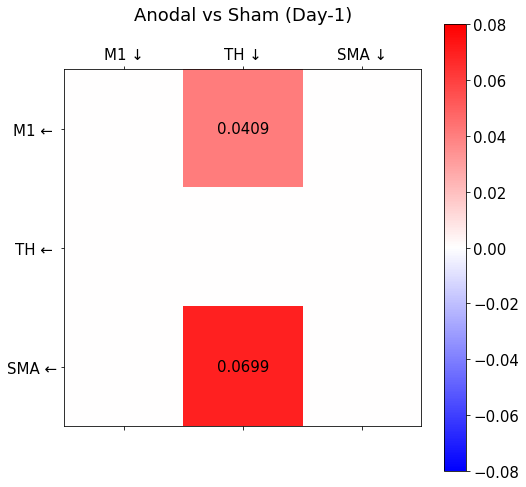

Cathodal vs Sham (Day-1)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.97506097e-07  0.00000000e+00]]


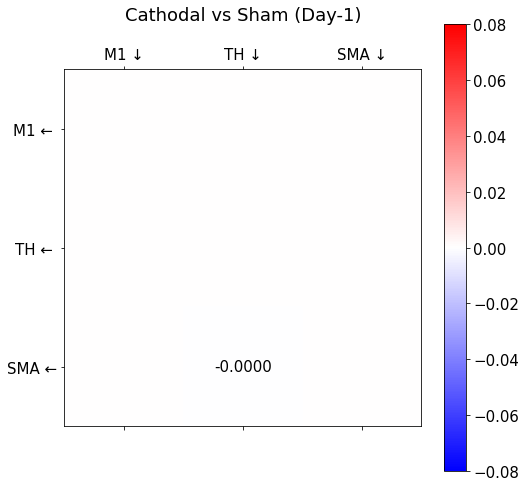

Anodal vs Cathodal (Day-1)
[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.06100502  0.          0.        ]]


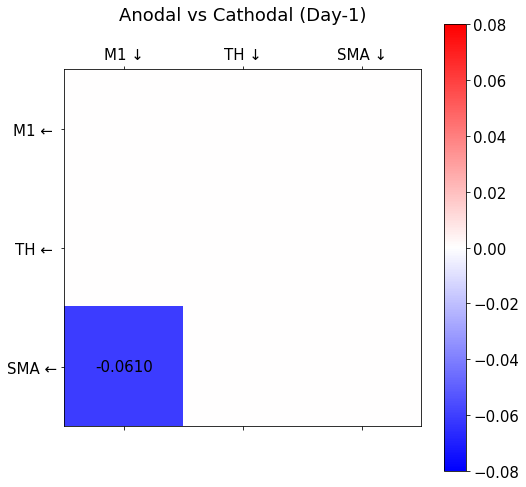

In [100]:
# Author Davide Aloi
# Description: plot PEB results (pairwise int day1 only)

import numpy as np
import glob
from nilearn import image
import matplotlib.pyplot as plt
import scipy.io

path_DCM = 'C:\\Users\\davide\\Documents\\GitHub\\raindrop_analyses_fmri_eeg\\fmri\\DCM\\dcm_results_p01\\BMApairwise_day1A.mat'
DCM_results = scipy.io.loadmat(path_DCM)

## Parameters
# posterior probability threshold used
PP_threshold = 0.5

# function to convert diagnoal values to Hz and recenter on 0
funcHz = lambda x: -0.5*(np.exp(x))+0.5 if x != 0 else 0

# Matrix plot xticklabels / yticklabels
labelsUp = ['M1 ↓', 'TH ↓', 'SMA ↓']
labelsLeft = ['M1 ← ', 'TH ← ', 'SMA ←']

# Sessions names
sessions = ['Anodal vs Sham (Day-1)',
            'Cathodal vs Sham (Day-1)',
            'Anodal vs Cathodal (Day-1)']
# i = session 
import pandas as pd 

for i in range(0, 3):
    print(sessions[i])
    title = sessions[i]
    # EP values session i
    this_EP_values = DCM_results['BMA'][i][0][0][0]['Ep'].todense()
    this_EP_values = this_EP_values[-9:72] # last 9 EP values are the ones I'm interested in
    this_EP_values = this_EP_values.reshape(3,3).T # and then we reshape and transpose (I've checked this multiple times)
    # this gives us the EP values we're interested in, in the right format (matrix) as you'd get if you were to open the
    # results from spm_dcm_peb_review

    # Converting EP diagnoal to HZ
    for x in range(0,3):
        this_EP_values[x,x] = funcHz(this_EP_values[x, x])


    # we have to do the same for the posterior probability (except Pp is a double and not a sparse double so there is no need
    # to use todense())
    this_PP_values = DCM_results['BMA'][i][0][0][0]['Pp'][-9:72].reshape(3,3).T
    EPfiltered = np.where(this_PP_values > 0.5, this_EP_values, 0)
    print(EPfiltered)
    db = pd.DataFrame(EPfiltered)
    db.to_csv(sessions[i] + '.csv', index=False, header=False)

    ## PLOT thresholded EP values
    plt.rcParams.update({'font.size': 15})
    plt.rcParams["figure.figsize"] = (8,8)  
    
    from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
    cm =  nilearn_cmaps['bwr'] #or plasma, coolwarm. cold_white_hot, bwr
    plt.matshow(EPfiltered, cmap = cm)
    plt.title(sessions[i] + '\n')
    c = plt.colorbar()
    plt.clim(-0.08, 0.08) 
    for (i, j), z in np.ndenumerate(EPfiltered):
        if z != 0:
            plt.text(j, i, '{:0.4f}'.format(z), ha='center', va='center')
    plt.xticks([0,1,2], labelsUp)

    plt.yticks([0,1,2], labelsLeft)
    

    plt.savefig(title + '.jpg', dpi = 240)
    plt.show()
    plt.close()